# PATTERN MINING

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np
from mlxtend.frequent_patterns import fpgrowth

In [ ]:
train = pd.read_csv('pp_train.csv')
test = pd.read_csv('pp_test.csv')
df = pd.concat([train, test], axis=0, ignore_index=True) #abbiamo unito train e test
#df = train

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16172 entries, 0 to 16171
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   originalTitle                16172 non-null  object 
 1   rating                       16172 non-null  int64  
 2   startYear                    16172 non-null  int64  
 3   endYear                      15387 non-null  float64
 4   runtimeMinutes               11577 non-null  float64
 5   awardWins                    16172 non-null  float64
 6   numVotes                     16172 non-null  int64  
 7   totalImages                  16172 non-null  int64  
 8   totalVideos                  16172 non-null  int64  
 9   totalCredits                 16172 non-null  int64  
 10  criticReviewsTotal           16172 non-null  int64  
 11  titleType                    16172 non-null  object 
 12  awardNominationsExcludeWins  16172 non-null  int64  
 13  canHaveEpisodes 

In [4]:
df.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal',
       'is_Documentary', 'is_History', 'is_Adventure', 'is_Thriller',
       'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography',
       'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult',
       'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime', 'is_Short',
       'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama',
       'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
       'fill_runtimeMinutes', 'is_from_Oceania', 'is_from_North America',
       'is_from_South America', 'is_from_Asia', 'is_from_Africa',
       'is_from_Europe', 'countryOfOrigin', 'countryOfOrigin_freq_enc',
       'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryO

## Gestione variabili 

### Osservare la distribuzione delle numeriche per binning

In [5]:
df['totalNominations'].value_counts().sort_index()

totalNominations
0.0      13468
1.0       1000
2.0        500
3.0        250
4.0        211
         ...  
152.0        1
160.0        1
170.0        1
172.0        2
306.0        1
Name: count, Length: 78, dtype: int64

count    16172.000000
mean         0.974895
std          6.199345
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        306.000000
Name: totalNominations, dtype: float64


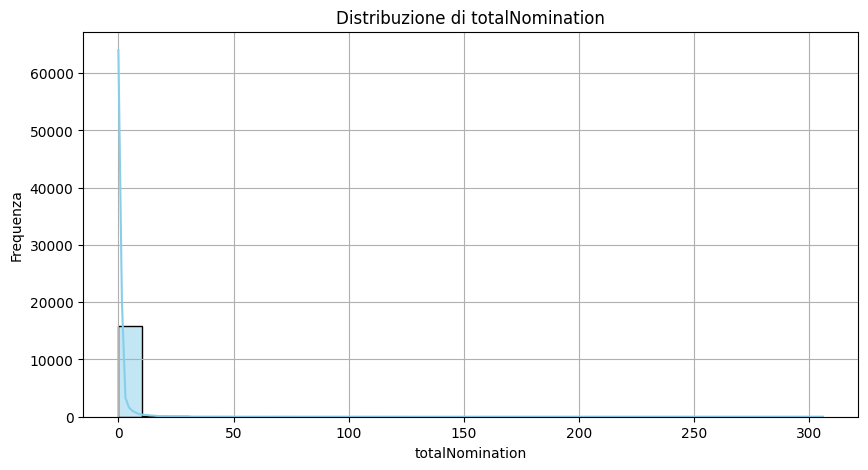

In [6]:
# Statistiche descrittive
print(df['totalNominations'].describe())

# Istogramma + KDE (curva di densità)
plt.figure(figsize=(10, 5))
sns.histplot(df['totalNominations'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribuzione di totalNomination')
plt.xlabel('totalNomination')
plt.ylabel('Frequenza')
plt.grid(True)
# plt.yscale("log")
plt.show()

In [7]:
df['startYear'].value_counts().sort_index()
# df['fill_runtimeMinutes_Bruno'].value_counts().sort_index()
# df['totalMedia'].value_counts().sort_index()
# df['numVotes'].value_counts().sort_index()
# df['totalCredits'].value_counts().sort_index()
# df['criticReviewsTotal'].value_counts().sort_index()
# df['numRegions'].value_counts().sort_index()
# df['userReviewsTotal'].value_counts().sort_index()
# df['rating'].value_counts().sort_index()

startYear
1878      1
1891      1
1893      1
1894      5
1895      5
       ... 
2020    386
2021    387
2022    353
2023    312
2024    126
Name: count, Length: 133, dtype: int64

### Trasformazione binaria con valori semanticamente significativi

In [8]:
df["canHaveEpisodes"] = df["canHaveEpisodes"].astype(int)
canhaveeps_dict = {0: "cant_have_episodes", 1: "can_have_episodes"}
df["canHaveEpisodes"] = df["canHaveEpisodes"].map(canhaveeps_dict)
df["canHaveEpisodes"]

0        cant_have_episodes
1        cant_have_episodes
2         can_have_episodes
3         can_have_episodes
4        cant_have_episodes
                ...        
16167    cant_have_episodes
16168    cant_have_episodes
16169    cant_have_episodes
16170    cant_have_episodes
16171    cant_have_episodes
Name: canHaveEpisodes, Length: 16172, dtype: object

In [9]:
df["isAdult"] = df["isAdult"].astype(int)
canhaveeps_dict = {0: "is_not_adult", 1: "is_adult"}
df["isAdult"] = df["isAdult"].map(canhaveeps_dict)
df["isAdult"]

0        is_not_adult
1        is_not_adult
2        is_not_adult
3        is_not_adult
4        is_not_adult
             ...     
16167    is_not_adult
16168    is_not_adult
16169    is_not_adult
16170    is_not_adult
16171    is_not_adult
Name: isAdult, Length: 16172, dtype: object

### Handling of numerical attributes
Delle seguenti variabili: 'rating', 'startYear', 'numVotes', 'totalCredits', 'criticReviewsTotal', 'numRegions', 'userReviewsTotal',
    'countryOfOrigin_freq_enc',
       'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryOfOrigin_AS',
       'countryOfOrigin_EU', 'countryOfOrigin_OC', 'countryOfOrigin_SA',
       'countryOfOrigin_UNK'
       'fill_runtimeMinutes_Bruno', 'totalNominations',
       'totalMedia'

In [10]:
df_copy = df.copy()

##### TotalNominations

In [11]:
df_copy["log_totalNominations"] = np.log1p(df["totalNominations"])

In [12]:
#TOTALNOMINATIONS LOG-TRANSFORMED
log_bins = [-0.01, 0, np.log(5), np.log(20), df_copy['log_totalNominations'].max()]
labels = ['ZeroNom', 'LowNom', 'MediumNom', 'VeryHighNom']

df_copy['log_nom_bin_cut'] = pd.cut(df_copy['log_totalNominations'], 
                                bins=log_bins, 
                                labels=labels)

print(df_copy.groupby('log_nom_bin_cut')['totalNominations'].describe())

                   count       mean        std   min   25%   50%    75%    max
log_nom_bin_cut                                                               
ZeroNom          13468.0   0.000000   0.000000   0.0   0.0   0.0   0.00    0.0
LowNom            1961.0   1.832738   1.019989   1.0   1.0   1.0   2.00    4.0
MediumNom          608.0   9.000000   3.818364   5.0   6.0   8.0  11.25   19.0
VeryHighNom        135.0  49.629630  42.109442  20.0  25.0  32.0  58.50  306.0


In [13]:
#TOTALNOMINATIONS NON LOG-TRANSFORMED   
bins = [-1, 0, 2, 10, df_copy['totalNominations'].max()]
labels = ['ZeroNom', 'LowNom', 'MediumNom', 'VeryHighNom']

df_copy['totalNominations_bin'] = pd.cut(df_copy['totalNominations'], 
                                bins=bins, 
                                labels=labels)

print(df_copy.groupby('totalNominations_bin')['totalNominations'].describe())

                        count       mean        std   min   25%   50%   75%  \
totalNominations_bin                                                          
ZeroNom               13468.0   0.000000   0.000000   0.0   0.0   0.0   0.0   
LowNom                 1500.0   1.333333   0.471562   1.0   1.0   1.0   2.0   
MediumNom               889.0   5.092238   2.047421   3.0   3.0   4.0   6.0   
VeryHighNom             315.0  29.330159  32.716484  11.0  13.0  18.0  29.0   

                        max  
totalNominations_bin         
ZeroNom                 0.0  
LowNom                  2.0  
MediumNom              10.0  
VeryHighNom           306.0  


##### TotalMedia

In [14]:
df_copy["log_totalMedia"] = np.log1p(df["totalMedia"])

In [15]:
#TOTALMEDIA NON LOG-TRANSFORMED
bins = [-1, 0, 1, 8, 50, df_copy['totalMedia'].max()]
labels = ['ZeroMedia', 'LowMedia', 'MediumMedia', 'HighMedia', 'VeryHighMedia']
df_copy['media_bin'] = pd.cut(df_copy['totalMedia'], bins=bins, labels=labels)

print(df_copy.groupby('media_bin')['totalMedia'].describe())

                count        mean         std   min   25%   50%    75%     max
media_bin                                                                     
ZeroMedia      3244.0    0.000000    0.000000   0.0   0.0   0.0    0.0     0.0
LowMedia       4718.0    1.000000    0.000000   1.0   1.0   1.0    1.0     1.0
MediumMedia    5036.0    3.853058    1.916388   2.0   2.0   3.0    5.0     8.0
HighMedia      2491.0   19.391811   10.393224   9.0  11.0  16.0   25.0    50.0
VeryHighMedia   683.0  172.879941  324.980243  51.0  67.0  91.0  145.0  3516.0


In [16]:
#TOTALMEDIA LOG-TRANSFORMED
log_bins = [-1, 0, 1.61, 3.1, 4.0, np.log(df_copy['totalMedia'].max())]
labels = ['ZeroMedia', 'LowMedia', 'MediumMedia', 'HighMedia', 'VeryHighMedia']
df_copy['log_media_bin'] = pd.cut(df_copy['totalMedia'], bins=log_bins, labels=labels)

print(df_copy.groupby('log_media_bin')['totalMedia'].describe())

                count      mean       std  min  25%  50%  75%  max
log_media_bin                                                     
ZeroMedia      3244.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
LowMedia       4718.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
MediumMedia    2704.0  2.345414  0.475591  2.0  2.0  2.0  3.0  3.0
HighMedia       708.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0
VeryHighMedia  1624.0  6.299261  1.110239  5.0  5.0  6.0  7.0  8.0


##### fill_runtimeMinutes_Bruno

In [17]:
df_copy["log_fill_runtimeMinutes_Bruno"] = np.log1p(df["fill_runtimeMinutes_Bruno"])

In [18]:
#FILL_RUNTIMEMINS_BRUNO NON LOG-TRANSFORMED
bins = [-1, 25, 60, 120, 180, df_copy['fill_runtimeMinutes_Bruno'].max()]
labels = ['VeryLowRuntime', 'LowRuntime', 'MediumRuntime', 'HighRuntime', "VeryHighRuntime"]

df_copy['runtime_bin'] = pd.cut(df_copy['fill_runtimeMinutes_Bruno'], bins=bins, labels=labels)
print(df_copy.groupby('runtime_bin')['fill_runtimeMinutes_Bruno'].describe())

                  count        mean         std    min    25%    50%    75%  \
runtime_bin                                                                   
VeryLowRuntime   3785.0   14.903303    7.492149    0.0    8.0   15.0   22.0   
LowRuntime       5560.0   42.296223   11.042357   26.0   30.0   43.0   50.0   
MediumRuntime    6194.0   89.693252   12.032890   61.0   83.0   90.0   97.0   
HighRuntime       524.0  142.404580   16.687101  121.0  129.0  138.0  152.0   
VeryHighRuntime   109.0  296.715596  294.919483  181.0  199.0  225.0  309.0   

                    max  
runtime_bin              
VeryLowRuntime     25.0  
LowRuntime         60.0  
MediumRuntime     120.0  
HighRuntime       180.0  
VeryHighRuntime  3000.0  


In [19]:
#FILL_RUNTIMEMINS_BRUNO LOG-TRANSFORMED
bins = [-np.inf, 2.0, 3.5, 4.5, 5.5, np.inf]
labels = ['VeryLowRuntime', 'LowRuntime', 'MediumRuntime', 'HighRuntime', 'VeryHighRuntime']

df_copy['log_runtime_bin'] = pd.cut(
    df_copy['log_fill_runtimeMinutes_Bruno'],
    bins=bins,
    labels=labels,
    ordered=True)

print(df_copy.groupby('log_runtime_bin')['fill_runtimeMinutes_Bruno'].describe())

                  count        mean         std    min    25%    50%    75%  \
log_runtime_bin                                                               
VeryLowRuntime    557.0    3.847397    1.731027    0.0    3.0    4.0    5.0   
LowRuntime       5157.0   21.527438    7.949552    7.0   14.0   24.0   30.0   
MediumRuntime    6460.0   62.572910   16.917661   33.0   46.0   60.0   80.0   
HighRuntime      3957.0  105.715694   22.297381   90.0   92.0   98.0  109.0   
VeryHighRuntime    41.0  448.780488  443.042465  247.0  291.0  352.0  420.0   

                    max  
log_runtime_bin          
VeryLowRuntime      6.0  
LowRuntime         32.0  
MediumRuntime      89.0  
HighRuntime       241.0  
VeryHighRuntime  3000.0  


##### rating

In [20]:
#RATING 
bins = [-1, 3, 6, 7, 8, df_copy['rating'].max()]
labels = ['VeryLowRating', 'LowRating', 'MediumRating', 'HighRating', "VeryHighRating"]
df_copy['rating_bin'] = pd.cut(df_copy['rating'], bins=bins, labels=labels)

print(df_copy['rating_bin'].value_counts())
print(df_copy.groupby('rating_bin')['rating'].describe())

rating_bin
HighRating        4743
MediumRating      4493
LowRating         4336
VeryHighRating    2380
VeryLowRating      220
Name: count, dtype: int64
                 count      mean       std  min  25%  50%  75%   max
rating_bin                                                          
VeryLowRating    220.0  2.677273  0.515009  1.0  2.0  3.0  3.0   3.0
LowRating       4336.0  5.526522  0.679397  4.0  5.0  6.0  6.0   6.0
MediumRating    4493.0  7.000000  0.000000  7.0  7.0  7.0  7.0   7.0
HighRating      4743.0  8.000000  0.000000  8.0  8.0  8.0  8.0   8.0
VeryHighRating  2380.0  9.144538  0.351708  9.0  9.0  9.0  9.0  10.0


##### numVotes

In [21]:
df_copy["log_numVotes"] = np.log1p(df["numVotes"])

In [22]:
#NUMVOTES LOG-TRANSFORMED
bins = [-np.inf, 2.7, 3.9, 5.0, 8.0, np.inf]
labels = ['VeryLowVotes', 'LowVotes', 'MediumVotes', 'HighVotes', 'VeryHighVotes']

# Applicazione
df_copy['log_numvotes_bin'] = pd.cut(
    df_copy['log_numVotes'],
    bins=bins,
    labels=labels
)

print(df_copy.groupby('log_numvotes_bin')['numVotes'].describe())

                   count          mean            std     min      25%  \
log_numvotes_bin                                                         
VeryLowVotes      3666.0      9.181124       2.338580     5.0     7.00   
LowVotes          5413.0     26.096250       9.584849    14.0    18.00   
MediumVotes       3038.0     87.668203      27.553615    49.0    64.00   
HighVotes         3484.0    624.902985     586.882406   148.0   228.75   
VeryHighVotes      571.0  38164.800350  101425.457222  2980.0  4124.50   

                     50%      75%       max  
log_numvotes_bin                             
VeryLowVotes         9.0     11.0      13.0  
LowVotes            24.0     33.0      48.0  
MediumVotes         83.0    109.0     147.0  
HighVotes          390.0    783.0    2973.0  
VeryHighVotes     6905.0  21639.0  966565.0  


In [23]:
#NUMVOTES NON LOG-TRANSFORMED
labels = ['VeryLowVotes', 'LowVotes', 'MediumVotes', 'HighVotes', 'VeryHighVotes']
bins = [4, 15, 50, 150, 1000, float('inf')]  # include il min=5 e max=1.071.372

df_copy['numVotes_bin'] = pd.cut(df['numVotes'], bins=bins, labels=labels, include_lowest=True)
print(df_copy.groupby('numVotes_bin')['numVotes'].describe())

                count          mean           std     min     25%     50%  \
numVotes_bin                                                                
VeryLowVotes   4342.0     10.011055      2.896966     5.0     8.0    10.0   
LowVotes       4858.0     28.290860      9.616359    16.0    20.0    26.0   
MediumVotes    2962.0     90.160027     27.750907    51.0    66.0    85.0   
HighVotes      2811.0    394.016364    221.960919   151.0   214.0   324.0   
VeryHighVotes  1199.0  19061.698916  72296.465442  1001.0  1542.0  2802.0   

                  75%       max  
numVotes_bin                     
VeryLowVotes     12.0      15.0  
LowVotes         35.0      50.0  
MediumVotes     111.0     150.0  
HighVotes       521.0     997.0  
VeryHighVotes  6440.5  966565.0  


##### StartYear

In [24]:
#STARTYEAR
bins =[
    1878,  # Cinema delle origini e muto
    1930,  # Cinema sonoro classico e radio
    1955,  # TV B/N e colore, cinema widescreen
    1980,  # Video domestico e media transazionali
    2000,  # DVD, internet e mobile
    2015,  # Streaming integrato e nuovi media
    df_copy['startYear'].max()] #era corrente
labels = ['pre-1930', '1930-1954', '1955-1979', '1980-1999', '2000-2019', 'post-2020']
df_copy['startYear_bin'] = pd.cut(df_copy['startYear'], bins=bins, labels=labels)

print(df_copy.groupby('startYear_bin')['startYear'].describe())

                count         mean        std     min      25%     50%  \
startYear_bin                                                            
pre-1930        528.0  1914.831439  11.311025  1891.0  1905.75  1916.0   
1930-1954      1054.0  1943.922201   7.444484  1931.0  1937.00  1944.0   
1955-1979      2948.0  1969.436906   6.904980  1956.0  1964.00  1970.0   
1980-1999      4394.0  1991.327720   5.392791  1981.0  1987.00  1992.0   
2000-2019      4064.0  2008.979085   4.125022  2001.0  2006.00  2009.0   
post-2020      3183.0  2019.513981   2.389949  2016.0  2017.00  2019.0   

                  75%     max  
startYear_bin                  
pre-1930       1925.0  1930.0  
1930-1954      1951.0  1955.0  
1955-1979      1975.0  1980.0  
1980-1999      1996.0  1999.0  
2000-2019      2012.0  2015.0  
post-2020      2021.0  2024.0  


##### totalCredits

In [25]:
df_copy["log_totalCredits"] = np.log1p(df["totalCredits"])

In [26]:
#TOTALCREDITS LOG-TRANSFORMED
bins = [-np.inf, 2.0, 3.0, 4.2, 6.0, np.inf]
labels = ['VeryLowCredits', 'LowCredits', 'MediumCredits', 'HighCredits', 'VeryHighCredits']

df_copy['log_totalCredits_bin'] = pd.cut(df_copy['log_totalCredits'], bins=bins, labels=labels)

In [27]:
print(df_copy.groupby('log_totalCredits_bin')['totalCredits'].describe())

                       count        mean          std    min    25%    50%  \
log_totalCredits_bin                                                         
VeryLowCredits        1369.0    3.424397     1.916462    0.0    2.0    4.0   
LowCredits            3488.0   12.847764     3.717982    7.0   10.0   13.0   
MediumCredits         7273.0   38.512856    12.718871   20.0   27.0   37.0   
HighCredits           3854.0  129.102750    67.472930   66.0   80.0  106.0   
VeryHighCredits        188.0  912.569149  1281.549009  403.0  499.0  619.5   

                         75%      max  
log_totalCredits_bin                   
VeryLowCredits          5.00      6.0  
LowCredits             16.00     19.0  
MediumCredits          48.00     65.0  
HighCredits           153.00    402.0  
VeryHighCredits       893.75  15742.0  


In [28]:
#TOTALCREDITS NON LOG-TRANSFORMED
labels = ['VeryLowCredits', 'LowCredits', 'MediumCredits', 'HighCredits', 'VeryHighCredits']
bins = [-1, 15, 35, 65, 200, float('inf')]

df_copy['totalCredits_bin'] = pd.cut(df['totalCredits'], bins=bins, labels=labels, include_lowest=True)

In [29]:
print(df_copy.groupby('totalCredits_bin')['totalCredits'].describe())

                   count        mean         std    min    25%    50%    75%  \
totalCredits_bin                                                               
VeryLowCredits    3849.0    8.286568    4.323488    0.0    5.0    8.0   12.0   
LowCredits        4395.0   24.857793    5.734295   16.0   20.0   25.0   30.0   
MediumCredits     3886.0   48.497169    8.379934   36.0   41.0   48.0   55.0   
HighCredits       3336.0  107.252098   35.102074   66.0   78.0   98.0  130.0   
VeryHighCredits    706.0  440.980170  720.213857  201.0  234.0  288.0  419.5   

                      max  
totalCredits_bin           
VeryLowCredits       15.0  
LowCredits           35.0  
MediumCredits        65.0  
HighCredits         200.0  
VeryHighCredits   15742.0  


##### criticReviewsTotal

In [30]:
df_copy["log_criticReviewsTotal"] = np.log1p(df["criticReviewsTotal"])

In [31]:
#CRITICREVIEWS LOG-TRANSFORMED
bins = [-0.01, 0.0, 1.4, 2.3, 3.4, 4.6, np.inf]
labels = [
    'NoCriticReviews',
    'FewCriticReviews',
    'ModerateCriticReviews',
    'ManyCriticReviews',
    'VeryHighCriticReviews',
    'ExtensiveCriticReviews'
]

df_copy['log_criticReviewsTotal_bin'] = pd.cut(
    df_copy['log_criticReviewsTotal'],
    bins=bins,
    labels=labels
)

In [32]:
print(df_copy.groupby('log_criticReviewsTotal_bin')['criticReviewsTotal'].describe())

                              count        mean        std   min    25%  \
log_criticReviewsTotal_bin                                                
NoCriticReviews             11241.0    0.000000   0.000000   0.0    0.0   
FewCriticReviews             3085.0    1.521880   0.722928   1.0    1.0   
ModerateCriticReviews         880.0    5.435227   1.332327   4.0    4.0   
ManyCriticReviews             642.0   14.981308   5.414745   9.0   10.0   
VeryHighCriticReviews         249.0   51.445783  18.713407  29.0   35.0   
ExtensiveCriticReviews         75.0  181.946667  89.882039  99.0  119.0   

                              50%    75%    max  
log_criticReviewsTotal_bin                       
NoCriticReviews               0.0    0.0    0.0  
FewCriticReviews              1.0    2.0    3.0  
ModerateCriticReviews         5.0    6.0    8.0  
ManyCriticReviews            13.0   18.0   28.0  
VeryHighCriticReviews        47.0   63.0   98.0  
ExtensiveCriticReviews      147.0  225.5  533.0  

In [33]:
#CRITICREVIEWS NON LOG-TRANSFORMED
labels = [
    'NoCriticReviews',
    'FewCriticReviews',
    'ModerateCriticReviews',
    'ManyCriticReviews',
    'VeryHighCriticReviews',
    'ExtensiveCriticReviews'
]
bins = [-1, 0, 1, 5, 20, 45, float('inf')]

df_copy['criticReviewsTotal_bin'] = pd.cut(df['criticReviewsTotal'], bins=bins, labels=labels, include_lowest=True)
print(df_copy.groupby('criticReviewsTotal_bin')['criticReviewsTotal'].describe())

                          count        mean        std   min   25%   50%  \
criticReviewsTotal_bin                                                     
NoCriticReviews         11241.0    0.000000   0.000000   0.0   0.0   0.0   
FewCriticReviews         1896.0    1.000000   0.000000   1.0   1.0   1.0   
ModerateCriticReviews    1690.0    2.966864   1.060666   2.0   2.0   3.0   
ManyCriticReviews         898.0   10.263920   3.900726   6.0   7.0   9.0   
VeryHighCriticReviews     239.0   29.665272   6.770308  21.0  24.0  28.0   
ExtensiveCriticReviews    208.0  107.379808  78.612761  46.0  56.0  79.5   

                           75%    max  
criticReviewsTotal_bin                 
NoCriticReviews           0.00    0.0  
FewCriticReviews          1.00    1.0  
ModerateCriticReviews     4.00    5.0  
ManyCriticReviews        13.00   20.0  
VeryHighCriticReviews    35.00   45.0  
ExtensiveCriticReviews  125.25  533.0  


##### numRegions

In [34]:
df_copy["log_numRegions"] = np.log1p(df["numRegions"])

In [35]:
#NUMREGIONS LOG-TRANSFORMED
bins = [-np.inf, 1.2, 2.0, 3.2, np.inf]
labels = ['VeryFewRegions', 'ModerateRegions', 'ManyRegions', 'GlobalRegions']

# Applicazione
df_copy['log_numRegions_bin'] = pd.cut(
    df_copy['log_numRegions'],
    bins=bins,
    labels=labels
)

In [36]:
print(df_copy.groupby('log_numRegions_bin')['numRegions'].describe())

                      count       mean       std   min   25%   50%   75%   max
log_numRegions_bin                                                            
VeryFewRegions      11268.0   1.164892  0.371099   1.0   1.0   1.0   1.0   2.0
ModerateRegions      2437.0   4.144850  1.068636   3.0   3.0   4.0   5.0   6.0
ManyRegions          2124.0  10.867702  4.483277   7.0   7.0   9.0  13.0  23.0
GlobalRegions         343.0  33.571429  8.855566  24.0  27.0  31.0  38.5  69.0


In [37]:
#NUMREGIONS NON LOG-TRANSFORMED
labels = ['VeryFewRegions', 'ModerateRegions', 'ManyRegions', 'GlobalRegions']
bins = [0, 1, 3, 8, float('inf')]

df_copy['numRegions_bin'] = pd.cut(df['numRegions'], bins=bins, labels=labels, include_lowest=True)
print(df_copy.groupby('numRegions_bin')['numRegions'].describe())


                  count       mean       std  min   25%   50%   75%   max
numRegions_bin                                                           
VeryFewRegions   9410.0   1.000000  0.000000  1.0   1.0   1.0   1.0   1.0
ModerateRegions  2731.0   2.319663  0.466431  2.0   2.0   2.0   3.0   3.0
ManyRegions      2514.0   5.701671  1.359445  4.0   4.0   6.0   7.0   8.0
GlobalRegions    1517.0  18.290046  9.942791  9.0  11.0  15.0  22.0  69.0


##### userReviewsTotal

In [38]:
df_copy["log_userReviewsTotal"] = np.log1p(df["userReviewsTotal"])

In [39]:
#USERREVIEWSTOTAL LOG-TRANSFORMED
bins = [-0.01, 0.0, 2.8, 5.0, np.inf]
labels = ['NoUserReviews', 'FewUserReviews', 'ModerateUserReviews', 'ManyUserReviews']

# Applicazione
df_copy['log_userReviewsTotal_bin'] = pd.cut(
    df_copy['log_userReviewsTotal'],
    bins=bins,
    labels=labels)

In [40]:
print(df_copy.groupby('log_userReviewsTotal_bin')['userReviewsTotal'].describe())

                           count        mean         std    min    25%    50%  \
log_userReviewsTotal_bin                                                        
NoUserReviews             9072.0    0.000000    0.000000    0.0    0.0    0.0   
FewUserReviews            6121.0    3.373142    3.281453    1.0    1.0    2.0   
ModerateUserReviews        840.0   41.333333   28.784652   16.0   21.0   30.0   
ManyUserReviews            139.0  452.179856  556.943018  148.0  192.0  290.0   

                            75%     max  
log_userReviewsTotal_bin                 
NoUserReviews               0.0     0.0  
FewUserReviews              4.0    15.0  
ModerateUserReviews        51.0   145.0  
ManyUserReviews           509.0  5727.0  


In [41]:
#USERREVIEWSTOTAL NON LOG-TRANSFORMED
labels = ['NoUserReviews', 'FewUserReviews', 'ModerateUserReviews', 'ManyUserReviews']
bins = [-1, 0, 3, 30, float('inf')]

df_copy['userReviewsTotal_bin'] = pd.cut(df['userReviewsTotal'], bins=bins, labels=labels, include_lowest=True)

In [42]:
print(df_copy.groupby('userReviewsTotal_bin')['userReviewsTotal'].describe())

                       count        mean         std   min   25%   50%    75%  \
userReviewsTotal_bin                                                            
NoUserReviews         9072.0    0.000000    0.000000   0.0   0.0   0.0    0.0   
FewUserReviews        4220.0    1.563270    0.737398   1.0   1.0   1.0    2.0   
ModerateUserReviews   2335.0   10.084368    6.596212   4.0   5.0   8.0   13.0   
ManyUserReviews        545.0  161.607339  329.066516  31.0  43.0  67.0  149.0   

                         max  
userReviewsTotal_bin          
NoUserReviews            0.0  
FewUserReviews           3.0  
ModerateUserReviews     30.0  
ManyUserReviews       5727.0  


##### countryOfOrigin_freqenc

In [43]:
df_copy["countryOfOrigin_freq_enc"].describe()

count    16172.000000
mean         0.193976
std          0.182497
min          0.000056
25%          0.018089
50%          0.098792
75%          0.397061
max          0.658429
Name: countryOfOrigin_freq_enc, dtype: float64

In [44]:
bins = [-0.01, 0.03, 0.3, 1.0]
labels = ['bassa_COFE', 'media_COFE', 'alta_COFE']

df_copy["country_freq_bin"] = pd.cut(
    df_copy["countryOfOrigin_freq_enc"],
    bins=bins,
    labels=labels
)

In [45]:
print(df_copy.groupby('country_freq_bin')['countryOfOrigin_freq_enc'].describe())

                   count      mean       std       min       25%       50%  \
country_freq_bin                                                             
bassa_COFE        4915.0  0.011203  0.007729  0.000056  0.005510  0.009406   
media_COFE        4254.0  0.065469  0.029882  0.030556  0.037012  0.047086   
alta_COFE         7003.0  0.400315  0.016402  0.397061  0.397061  0.397061   

                       75%       max  
country_freq_bin                      
bassa_COFE        0.017532  0.029888  
media_COFE        0.098792  0.204931  
alta_COFE         0.397061  0.658429  


### Handling of categorical attributes

##### countryOfOrigin

In [46]:
# # BINARIZZAZIONE -  ONE HOT ENCODING 
# df_copy['from_Europe_bin'] = (df_copy['countryOfOrigin_EU'] > 0).astype(int)
# df_copy['from_NorthAmerica_bin'] = (df_copy['countryOfOrigin_NA'] > 0).astype(int)
# df_copy['from_SouthAmerica_bin'] = (df_copy['countryOfOrigin_SA'] > 0).astype(int)
# df_copy['from_Asia_bin'] = (df_copy['countryOfOrigin_SA'] > 0).astype(int)
# df_copy['from_Oceania_bin'] = (df_copy['countryOfOrigin_OC'] > 0).astype(int)
# df_copy['from_Africa_bin'] = (df_copy['countryOfOrigin_AF'] > 0).astype(int)
# df_copy['from_Unknown_bin'] = (df_copy['countryOfOrigin_UNK'] > 0).astype(int)


In [47]:
# DISCRETIZZAZIONE A PIù LIVELLI
def discretize_continent_count(df, col_name, cont):
    new_col = f'{cont }_bin'
    
    def label(value):
        if value == 0:
            return f'not_{cont}'
       # elif value == 1:
        #    return f'one_{cont}'
        else:
            return f'is_{cont}'
    
    df[new_col] = df[col_name].apply(label)

# applico funzione
discretize_continent_count(df_copy, "countryOfOrigin_NA", "from_NorthAmerica")
discretize_continent_count(df_copy, "countryOfOrigin_EU", "from_Europe")
discretize_continent_count(df_copy, "countryOfOrigin_SA", "from_SouthAmerica")
discretize_continent_count(df_copy, "countryOfOrigin_AS", "from_Asia")
discretize_continent_count(df_copy, "countryOfOrigin_OC", "from_Oceania")
discretize_continent_count(df_copy, "countryOfOrigin_AF", "from_Africa")
discretize_continent_count(df_copy, "countryOfOrigin_UNK", "from_Unknown")

In [48]:
df_copy.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,log_userReviewsTotal_bin,userReviewsTotal_bin,country_freq_bin,from_NorthAmerica_bin,from_Europe_bin,from_SouthAmerica_bin,from_Asia_bin,from_Oceania_bin,from_Africa_bin,from_Unknown_bin
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,1995,1995.0,NaN,0.0,779,1,0,21,...,NoUserReviews,NoUserReviews,alta_COFE,is_from_NorthAmerica,not_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown
1,Idealnaya para,6,1992,1992.0,NaN,0.0,38,1,0,24,...,FewUserReviews,FewUserReviews,bassa_COFE,not_from_NorthAmerica,is_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown
2,MasterChef Celebrity México,6,2021,NaN,NaN,0.0,15,22,0,56,...,NoUserReviews,NoUserReviews,bassa_COFE,is_from_NorthAmerica,not_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown
3,Seutateueob,8,2020,2020.0,80.0,1.0,15718,347,2,47,...,ManyUserReviews,ManyUserReviews,bassa_COFE,not_from_NorthAmerica,not_from_Europe,not_from_SouthAmerica,is_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown
4,Lightdance,9,1995,1995.0,34.0,0.0,14,1,0,0,...,FewUserReviews,FewUserReviews,alta_COFE,is_from_NorthAmerica,not_from_Europe,not_from_SouthAmerica,not_from_Asia,not_from_Oceania,not_from_Africa,not_from_Unknown


## Pattern Mining

### Transactions Creation

In [49]:
df_copy.columns

Index(['originalTitle', 'rating', 'startYear', 'endYear', 'runtimeMinutes',
       'awardWins', 'numVotes', 'totalImages', 'totalVideos', 'totalCredits',
       'criticReviewsTotal', 'titleType', 'awardNominationsExcludeWins',
       'canHaveEpisodes', 'isAdult', 'numRegions', 'userReviewsTotal',
       'is_Documentary', 'is_History', 'is_Adventure', 'is_Thriller',
       'is_Game-Show', 'is_Comedy', 'is_Sci-Fi', 'is_Romance', 'is_Biography',
       'is_Musical', 'is_Western', 'is_Music', 'is_Film-Noir', 'is_Adult',
       'is_Reality-TV', 'is_News', 'is_Action', 'is_Crime', 'is_Short',
       'is_Fantasy', 'is_Family', 'is_Mystery', 'is_Talk-Show', 'is_Drama',
       'is_Sport', 'is_War', 'is_Horror', 'is_Animation',
       'fill_runtimeMinutes', 'is_from_Oceania', 'is_from_North America',
       'is_from_South America', 'is_from_Asia', 'is_from_Africa',
       'is_from_Europe', 'countryOfOrigin', 'countryOfOrigin_freq_enc',
       'countryOfOrigin_NA', 'countryOfOrigin_AF', 'countryO

In [50]:
cols = [
        #"canHaveEpisodes", 
        #"isAdult",
        #"totalNominations_bin", 
        #"media_bin",
        "rating_bin", "runtime_bin", "numVotes_bin", 
        #"startYear_bin",
        "totalCredits_bin", 
         "criticReviewsTotal_bin", 
         "country_freq_bin",
        # "numRegions_bin", 
        # "userReviewsTotal_bin"
        "titleType",
        'from_NorthAmerica_bin','from_Europe_bin' , 'from_SouthAmerica_bin', 'from_Asia_bin', 'from_Oceania_bin', 'from_Africa_bin', 'from_Unknown_bin'
]


# #FUNZIONANTI COME BASE
#     #     "canHaveEpisodes", "isAdult",
#     #     "totalNominations_bin", "media_bin"
#           "rating_bin", "runtime_bin", "numVotes_bin", "startYear_bin",
#     #     "totalCredits_bin", "criticReviewsTotal_bin", "numRegions_bin", "userReviewsTotal_bin"
#           "titleType",
#           'from_NorthAmerica_bin', 'from_Europe_bin' ,'from_SouthAmerica_bin', 'from_Asia_bin', 'from_Oceania_bin', 'from_Africa_bin', 'from_Unknown_bin'

#TUTTE
    #     "canHaveEpisodes", "isAdult",
    #     "totalNominations_bin", "media_bin"
    #     "rating_bin", "runtime_bin", "numVotes_bin", "startYear_bin",
    #     "totalCredits_bin", "criticReviewsTotal_bin", "numRegions_bin", "userReviewsTotal_bin"
    #     "titleType",
    #      'from_NorthAmerica_bin', 'from_Europe_bin' ,'from_SouthAmerica_bin', 'from_Asia_bin', 'from_Oceania_bin', 'from_Africa_bin', 'from_Unknown_bin'




In [51]:
transactions = []

for index, row in df_copy[cols].iterrows():
    transaction = []
    for col in cols:
        value = str(row[col])
        if not value.startswith('not_'):  # Ignora 'none_from_*'
            transaction.append(value)
    transactions.append(transaction)

# Verifica risultato
print(len(transactions))
print(transactions[10:15])


16172
[['VeryHighRating', 'LowRuntime', 'VeryLowVotes', 'HighCredits', 'NoCriticReviews', 'alta_COFE', 'tvSpecial', 'is_from_NorthAmerica'], ['MediumRating', 'LowRuntime', 'LowVotes', 'MediumCredits', 'NoCriticReviews', 'bassa_COFE', 'movie', 'is_from_Unknown'], ['VeryLowRating', 'MediumRuntime', 'HighVotes', 'HighCredits', 'FewCriticReviews', 'alta_COFE', 'movie', 'is_from_NorthAmerica'], ['MediumRating', 'MediumRuntime', 'HighVotes', 'HighCredits', 'FewCriticReviews', 'media_COFE', 'movie', 'is_from_Europe'], ['VeryHighRating', 'VeryLowRuntime', 'VeryHighVotes', 'HighCredits', 'ModerateCriticReviews', 'alta_COFE', 'tvEpisode', 'is_from_NorthAmerica']]


In [52]:
# Let's utilize TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_apriori = pd.DataFrame(te_array, columns=te.columns_)

# Visualizza le prime righe per assicurarti che la trasformazione sia corretta
print(df_apriori.head())

   ExtensiveCriticReviews  FewCriticReviews  HighCredits  HighRating  \
0                   False              True        False        True   
1                   False             False        False       False   
2                   False             False        False       False   
3                   False             False        False        True   
4                   False             False        False       False   

   HighRuntime  HighVotes  LowCredits  LowRating  LowRuntime  LowVotes  ...  \
0        False       True        True      False        True     False  ...   
1        False      False        True       True       False      True  ...   
2        False      False       False       True        True     False  ...   
3        False      False       False      False       False     False  ...   
4        False      False       False      False        True     False  ...   

   media_COFE  movie  short  tvEpisode  tvMiniSeries  tvMovie  tvSeries  \
0       False  Fa

### Confronto itemset per support

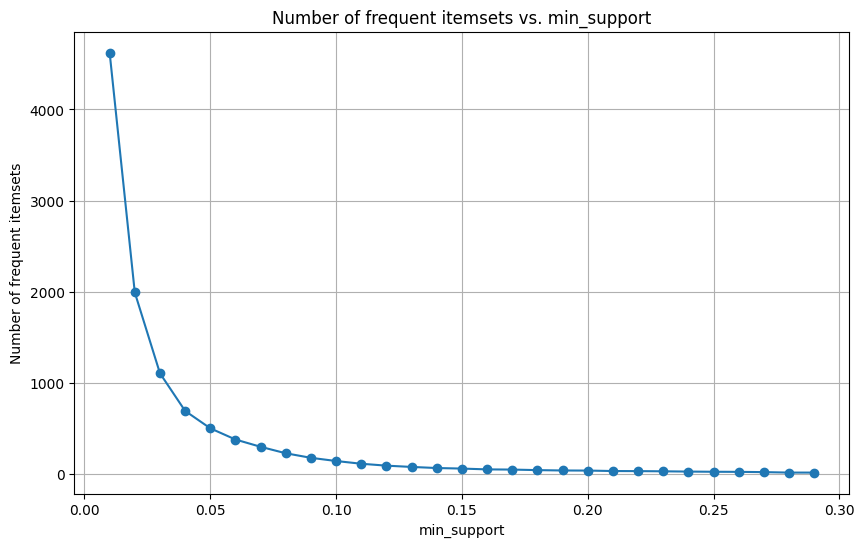

In [53]:
# Genera una lista di min_sup da testare
min_sups = [round(x, 2) for x in list(np.arange(0.01, 0.3, 0.01))]

# Lista per salvare il numero di itemset per ciascun supporto
num_itemsets = []

# Calcolo degli itemset frequenti per ogni min_sup
for min_sup in min_sups:
    frequent_itemsets = apriori(df_apriori, min_support=min_sup, use_colnames=True)
    num_itemsets.append(len(frequent_itemsets))

# Plot
plt.figure(figsize=(10,6))
plt.plot(min_sups, num_itemsets, marker='o')
plt.title('Number of frequent itemsets vs. min_support')
plt.xlabel('min_support')
plt.ylabel('Number of frequent itemsets')
plt.grid(True)
plt.show()


### Apriori

In [54]:
min_support = 0.08  # 10% supporto minimo
min_confidence = 0.6  # 60% confidenza minima --> serve dopo nella fase di rules extraction

# Apriori
frequent_itemsets_apriori = apriori(df_apriori, min_support=min_support, use_colnames=True)

# FRA -< Filtra gli itemset con almeno 2 item (lunghezza >= 2)
    #frequent_itemsets_apriori = frequent_itemsets_apriori[frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x) >= 2)]
    #frequent_itemsets_apriori.reset_index(drop=True, inplace=True)

print(frequent_itemsets_apriori.info())
print(frequent_itemsets_apriori.head(51))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   226 non-null    float64
 1   itemsets  226 non-null    object 
dtypes: float64(1), object(1)
memory usage: 3.7+ KB
None
     support                             itemsets
0   0.117240                   (FewCriticReviews)
1   0.206282                        (HighCredits)
2   0.293285                         (HighRating)
3   0.173819                          (HighVotes)
4   0.271766                         (LowCredits)
5   0.268118                          (LowRating)
6   0.343804                         (LowRuntime)
7   0.300396                           (LowVotes)
8   0.240292                      (MediumCredits)
9   0.277826                       (MediumRating)
10  0.383008                      (MediumRuntime)
11  0.183156                        (MediumVotes)
12  0.104502              (Modera

### maximal itemset

In [55]:
# Find maximal itemsets (those that are not subsets of any other itemsets)
maximal_itemsets_apriori = frequent_itemsets_apriori[frequent_itemsets_apriori['itemsets'].apply(lambda x: not any(x < y for y in frequent_itemsets_apriori['itemsets']))]

# Display the results
print(maximal_itemsets_apriori.info())
print(maximal_itemsets_apriori.head(15))

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 0 to 225
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   85 non-null     float64
 1   itemsets  85 non-null     object 
dtypes: float64(1), object(1)
memory usage: 2.0+ KB
None
     support                        itemsets
0   0.117240              (FewCriticReviews)
12  0.104502         (ModerateCriticReviews)
27  0.085023                      (tvSeries)
28  0.086137       (HighCredits, LowRuntime)
29  0.080448    (MediumRuntime, HighCredits)
30  0.110314  (NoCriticReviews, HighCredits)
33  0.087930        (tvEpisode, HighCredits)
35  0.084776          (HighRating, LowVotes)
38  0.089105    (HighRating, is_from_Europe)
40  0.083849        (media_COFE, HighRating)
44  0.081313        (LowCredits, LowRuntime)
50  0.093804        (bassa_COFE, LowCredits)
51  0.083910    (LowCredits, is_from_Europe)
54  0.083849           (LowRating, LowVotes)
58  0.096772  

### Association Rules

In [56]:
#Apriori
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=min_confidence)
rules_apriori.info()
rules_apriori.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         197 non-null    object 
 1   consequents         197 non-null    object 
 2   antecedent support  197 non-null    float64
 3   consequent support  197 non-null    float64
 4   support             197 non-null    float64
 5   confidence          197 non-null    float64
 6   lift                197 non-null    float64
 7   representativity    197 non-null    float64
 8   leverage            197 non-null    float64
 9   conviction          197 non-null    float64
 10  zhangs_metric       197 non-null    float64
 11  jaccard             197 non-null    float64
 12  certainty           197 non-null    float64
 13  kulczynski          197 non-null    float64
dtypes: float64(12), object(2)
memory usage: 21.7+ KB


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(HighRating),(NoCriticReviews),0.293285,0.695090,0.208880,0.712207,1.024626,1.0,0.005020,1.059478,0.034008,0.267968,0.056139,0.506357
1,(LowCredits),(NoCriticReviews),0.271766,0.695090,0.206282,0.759044,1.092008,1.0,0.017381,1.265419,0.115699,0.271220,0.209748,0.527908
2,(LowRating),(NoCriticReviews),0.268118,0.695090,0.176045,0.656596,0.944620,1.0,-0.010321,0.887904,-0.074164,0.223645,-0.126248,0.454933
3,(LowRuntime),(NoCriticReviews),0.343804,0.695090,0.270467,0.786691,1.131782,1.0,0.031493,1.429425,0.177443,0.351976,0.300418,0.587901
4,(tvEpisode),(LowRuntime),0.290502,0.343804,0.200099,0.688804,2.003477,1.0,0.100223,2.108624,0.705947,0.460837,0.525757,0.635409
5,(LowVotes),(NoCriticReviews),0.300396,0.695090,0.253092,0.842528,1.212113,1.0,0.044290,1.936276,0.250133,0.340913,0.483545,0.603321
6,(MediumCredits),(NoCriticReviews),0.240292,0.695090,0.159968,0.665723,0.957751,1.0,-0.007057,0.912147,-0.054879,0.206300,-0.096314,0.447931
7,(MediumRating),(NoCriticReviews),0.277826,0.695090,0.184826,0.665257,0.957080,1.0,-0.008288,0.910877,-0.058466,0.234523,-0.097843,0.465579
8,(movie),(MediumRuntime),0.342258,0.383008,0.295882,0.864499,2.257131,1.0,0.164794,4.553403,0.846776,0.689084,0.780384,0.818510
9,(MediumRuntime),(movie),0.383008,0.342258,0.295882,0.772522,2.257131,1.0,0.164794,2.891450,0.902701,0.689084,0.654153,0.818510


### Scelta valori confidence

In [57]:
from mlxtend.frequent_patterns import association_rules

conf_values = [0.4, 0.5, 0.6, 0.7]
for c in conf_values:
    rules = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=c)
    print(f"min_confidence={c}: {len(rules)} regole trovate, lift medio = {rules['lift'].mean():.2f}")


min_confidence=0.4: 371 regole trovate, lift medio = 1.84
min_confidence=0.5: 257 regole trovate, lift medio = 1.95
min_confidence=0.6: 197 regole trovate, lift medio = 2.01
min_confidence=0.7: 146 regole trovate, lift medio = 1.99


In [58]:
rules_apriori.sort_values(by="lift", axis=0, ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
173,"(movie, alta_COFE)","(MediumRuntime, is_from_NorthAmerica)",0.104254,0.150940,0.088919,0.852906,5.650635,1.0,0.073183,5.772239,0.918820,0.534771,0.826757,0.721005
175,"(MediumRuntime, alta_COFE)","(movie, is_from_NorthAmerica)",0.131585,0.122063,0.088919,0.675752,5.536099,1.0,0.072857,2.707609,0.943521,0.539790,0.630670,0.702111
174,"(movie, is_from_NorthAmerica)","(MediumRuntime, alta_COFE)",0.122063,0.131585,0.088919,0.728470,5.536099,1.0,0.072857,3.198228,0.933287,0.539790,0.687327,0.702111
119,"(VeryLowCredits, VeryLowRuntime)",(short),0.101348,0.152980,0.083168,0.820622,5.364230,1.0,0.067664,4.721990,0.905334,0.485910,0.788225,0.682138
120,"(VeryLowCredits, short)",(VeryLowRuntime),0.089537,0.234047,0.083168,0.928867,3.968730,1.0,0.062213,10.767968,0.821594,0.345936,0.907132,0.642109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,"(movie, MediumRuntime, bassa_COFE)",(NoCriticReviews),0.132575,0.695090,0.086322,0.651119,0.936741,1.0,-0.005829,0.873966,-0.072229,0.116440,-0.144209,0.387654
19,(is_from_NorthAmerica),(NoCriticReviews),0.477306,0.695090,0.310537,0.650602,0.935997,1.0,-0.021234,0.872673,-0.115687,0.360310,-0.145905,0.548680
116,"(movie, bassa_COFE)",(NoCriticReviews),0.143396,0.695090,0.092629,0.645968,0.929330,1.0,-0.007044,0.861249,-0.081536,0.124192,-0.161104,0.389615
112,"(alta_COFE, is_from_NorthAmerica)",(NoCriticReviews),0.433032,0.695090,0.277764,0.641439,0.922814,1.0,-0.023233,0.850371,-0.128559,0.326643,-0.175957,0.520524


### Target Prediction: various attempts (find the most informative one)

In [59]:
# Filtro le regole con "nord america" nei consequents
rules_north_am = rules_apriori[rules_apriori['consequents'] == frozenset({'is_from_NorthAmerica'})]


# Ordina le regole per lift in ordine decrescente
rules_north_am_sorted = rules_north_am.sort_values(by='lift', ascending=False)

print(rules_north_am_sorted)

                                           antecedents  \
24                                         (alta_COFE)   
96                            (MediumVotes, alta_COFE)   
181            (tvEpisode, NoCriticReviews, alta_COFE)   
177       (NoCriticReviews, VeryLowRuntime, alta_COFE)   
169                  (movie, MediumRuntime, alta_COFE)   
160             (NoCriticReviews, LowVotes, alta_COFE)   
152                 (tvEpisode, LowRuntime, alta_COFE)   
141           (NoCriticReviews, LowRuntime, alta_COFE)   
136                 (tvEpisode, HighRating, alta_COFE)   
131           (NoCriticReviews, HighRating, alta_COFE)   
129                             (tvEpisode, alta_COFE)   
127                                 (movie, alta_COFE)   
125                          (VeryLowVotes, alta_COFE)   
123                        (VeryLowRuntime, alta_COFE)   
121                        (VeryLowCredits, alta_COFE)   
110                       (NoCriticReviews, alta_COFE)   
86            

In [60]:
# Filter the rule where the consequent contains "is_from_NorthAmerica"
rule_for_highrated = [r for r in rules_apriori.iterrows() if 'is_from_NorthAmerica' in r[1]['consequents']]

# Extract rule details (antecedents and consequents)
if len(rule_for_highrated) > 0:
    selected_rule = rule_for_highrated[0][1]  # Take the first matching rule
    to_predict = ", ".join(selected_rule['consequents'])  # Convert frozenset to string
    how = ", ".join(selected_rule['antecedents'])  # Convert frozenset to string

    print("To predict:", to_predict)
    print("How?", how)
else:
    print("No rules found with 'is_from_NorthAmerica' in the consequents.")


To predict: is_from_NorthAmerica
How? alta_COFE


In [61]:
# Filtro le regole con "VeryFewRegions" nei consequents
rules_north_am = rules_apriori[rules_apriori['consequents'] == frozenset({'VeryFewRegions'})]

# Ordina le regole per lift in ordine decrescente
rules_north_am_sorted = rules_north_am.sort_values(by='lift', ascending=False)

print(rules_north_am_sorted)

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


In [62]:
# Filtro le regole con "low runtime" nei consequents
rules_north_am = rules_apriori[rules_apriori['consequents'] == frozenset({'LowRuntime'})]

# Ordina le regole per lift in ordine decrescente
rules_north_am_sorted = rules_north_am.sort_values(by='lift', ascending=False)

print(rules_north_am_sorted)

                                           antecedents   consequents  \
62                              (tvEpisode, alta_COFE)  (LowRuntime)   
153       (tvEpisode, alta_COFE, is_from_NorthAmerica)  (LowRuntime)   
145            (tvEpisode, NoCriticReviews, alta_COFE)  (LowRuntime)   
190  (tvEpisode, NoCriticReviews, alta_COFE, is_fro...  (LowRuntime)   
65                   (tvEpisode, is_from_NorthAmerica)  (LowRuntime)   
149  (tvEpisode, NoCriticReviews, is_from_NorthAmer...  (LowRuntime)   
4                                          (tvEpisode)  (LowRuntime)   
58                        (tvEpisode, NoCriticReviews)  (LowRuntime)   
31                             (tvEpisode, HighRating)  (LowRuntime)   

     antecedent support  consequent support   support  confidence      lift  \
62             0.165533            0.343804  0.119280    0.720583  2.095911   
153            0.165533            0.343804  0.119280    0.720583  2.095911   
145            0.121259            0.34380

In [63]:
# Filter the rule where the consequent contains "HighRated"
rule_for_highrated = [r for r in rules_apriori.iterrows() if 'LowRuntime' in r[1]['consequents']]

# Extract rule details (antecedents and consequents)
if len(rule_for_highrated) > 0:
    selected_rule = rule_for_highrated[0][1]  # Take the first matching rule
    to_predict = ", ".join(selected_rule['consequents'])  # Convert frozenset to string
    how = ", ".join(selected_rule['antecedents'])  # Convert frozenset to string

    print("To predict:", to_predict)
    print("How?", how)
else:
    print("No rules found with 'LowRuntime' in the consequents.")


To predict: LowRuntime
How? tvEpisode
